In [1]:
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import epiweeks
import geopandas as gpd
import altair as alt
import shapely

In [2]:
df_macros = pd.read_csv('../macro_saude.csv')
df_macros['name_code_macro'] = df_macros['name_macro'].astype(str) + ' - ' + df_macros.code_macro.astype(str)

df_macros['geocode'] = df_macros.geocode.astype(int)

df_muni = gpd.read_file('/Users/eduardoaraujo/Downloads/BR_municipios.gpkg')

df_muni['codarea'] = df_muni.codarea.astype(int)
df_muni = df_muni.merge(df_macros[['geocode', 'code_macro', 'name_code_macro','name_macro']], left_on='codarea', right_on='geocode', how='left')
del df_muni['id']
df_muni

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,codarea,geometry,geocode,code_macro,name_code_macro,name_macro
0,1100015,"POLYGON ((-62.41768 -13.11889, -62.41900 -13.1...",1100015,1101,Cacoal - 1101,Cacoal
1,1100023,"POLYGON ((-63.59702 -10.00042, -63.59792 -9.99...",1100023,1102,Porto Velho - 1102,Porto Velho
2,1100031,"POLYGON ((-60.37159 -13.31858, -60.37349 -13.3...",1100031,1101,Cacoal - 1101,Cacoal
3,1100049,"POLYGON ((-61.54899 -11.61909, -61.55150 -11.6...",1100049,1101,Cacoal - 1101,Cacoal
4,1100056,"POLYGON ((-60.74300 -13.12241, -60.74130 -13.1...",1100056,1101,Cacoal - 1101,Cacoal
...,...,...,...,...,...,...
5565,5222005,"POLYGON ((-48.49011 -17.00200, -48.49040 -17.0...",5222005,5210,Centro Sudeste - 5210,Centro Sudeste
5566,5222054,"POLYGON ((-49.78259 -17.88622, -49.78410 -17.8...",5222054,5210,Centro Sudeste - 5210,Centro Sudeste
5567,5222203,"POLYGON ((-47.11079 -14.67668, -47.10961 -14.6...",5222203,5207,Nordeste - 5207,Nordeste
5568,5222302,"POLYGON ((-48.59278 -15.36469, -48.59482 -15.3...",5222302,5209,Centro-Norte - 5209,Centro-Norte


In [3]:
df_macros.loc[df_macros.code_macro == 5209].shape

(60, 9)

In [4]:
df_muni.loc[df_muni.geometry.isna() == True]

,codarea,geometry,geocode,code_macro,name_code_macro,name_macro


In [5]:
df_muni = df_muni.dropna()

df_muni

,codarea,geometry,geocode,code_macro,name_code_macro,name_macro
0,1100015,"POLYGON ((-62.41768 -13.11889, -62.41900 -13.1...",1100015,1101,Cacoal - 1101,Cacoal
1,1100023,"POLYGON ((-63.59702 -10.00042, -63.59792 -9.99...",1100023,1102,Porto Velho - 1102,Porto Velho
2,1100031,"POLYGON ((-60.37159 -13.31858, -60.37349 -13.3...",1100031,1101,Cacoal - 1101,Cacoal
3,1100049,"POLYGON ((-61.54899 -11.61909, -61.55150 -11.6...",1100049,1101,Cacoal - 1101,Cacoal
4,1100056,"POLYGON ((-60.74300 -13.12241, -60.74130 -13.1...",1100056,1101,Cacoal - 1101,Cacoal
...,...,...,...,...,...,...
5565,5222005,"POLYGON ((-48.49011 -17.00200, -48.49040 -17.0...",5222005,5210,Centro Sudeste - 5210,Centro Sudeste
5566,5222054,"POLYGON ((-49.78259 -17.88622, -49.78410 -17.8...",5222054,5210,Centro Sudeste - 5210,Centro Sudeste
5567,5222203,"POLYGON ((-47.11079 -14.67668, -47.10961 -14.6...",5222203,5207,Nordeste - 5207,Nordeste
5568,5222302,"POLYGON ((-48.59278 -15.36469, -48.59482 -15.3...",5222302,5209,Centro-Norte - 5209,Centro-Norte


In [6]:
import shapely

In [7]:
from shapely.ops import unary_union

In [8]:
merged = unary_union(df_muni.loc[df_muni.code_macro == 5207].geometry.values)

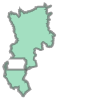

In [9]:
merged

In [10]:
df_muni.code_macro.unique()

array([1101, 1102, 1201, 1302, 1304, 1303, 1401, 1512, 1509, 1511, 1510,
       1601, 1702, 1701, 2109, 2111, 2110, 2207, 2208, 2210, 2209, 2308,
       2310, 2309, 2307, 2306, 2402, 2401, 2501, 2502, 2503, 2607, 2606,
       2605, 2608, 2703, 2704, 2801, 2917, 2913, 2914, 2911, 2910, 2916,
       2915, 2918, 2912, 3113, 3103, 3110, 3114, 3106, 3112, 3105, 3111,
       3101, 3107, 3102, 3104, 3109, 3108, 3207, 3208, 3206, 3205, 3312,
       3310, 3311, 3533, 3531, 3528, 3518, 3529, 3519, 3532, 3530, 3526,
       3525, 3527, 3520, 3522, 3524, 3523, 3534, 3521, 4105, 4107, 4106,
       4108, 4212, 4213, 4216, 4214, 4211, 4210, 4215, 4309, 4311, 4314,
       4312, 4310, 4313, 4308, 5005, 5008, 5006, 5007, 5105, 5104, 5103,
       5101, 5102, 5208, 5209, 5206, 5207, 5210, 5302])

In [11]:
def combineBorders(geoms):
    return unary_union([
        geom if geom.is_valid else geom.buffer(0) for geom in geoms
    ])


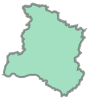

In [12]:
combineBorders(df_muni.loc[df_muni.code_macro == 2308.0].geometry.values)

In [13]:
merge_pols = []

for code in df_muni.code_macro.unique(): 
    
    #print(code)
    
    merge_pols.append( combineBorders(df_muni.loc[df_muni.code_macro == code].geometry.values))
    
    
df2 = pd.DataFrame()

df2['code_macro'] = df_muni.code_macro.unique()
df2['geometry'] = merge_pols

df2

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1784: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:387: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  iter(obj)  # Can iterate over it.
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/pandas/core/dtypes/inference.py:388: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the

,code_macro,geometry
0,1101,POLYGON ((-62.11621400475832 -13.1594173394963...
1,1102,POLYGON ((-63.12990445411402 -12.1944170173152...
2,1201,POLYGON ((-69.42490983219969 -10.9349165032825...
3,1302,POLYGON ((-70.73518737322664 -7.76698615268794...
4,1304,POLYGON ((-67.76548066624986 -9.44838098079055...
...,...,...
113,5209,POLYGON ((-49.61281633986379 -15.8852815118227...
114,5206,POLYGON ((-51.10389693310226 -19.3078195980021...
115,5207,(POLYGON ((-47.51099269676358 -16.049905584742...
116,5210,POLYGON ((-50.04801279083917 -18.6388086657006...


In [16]:
df2 = df2.dropna()

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


<Axes: >

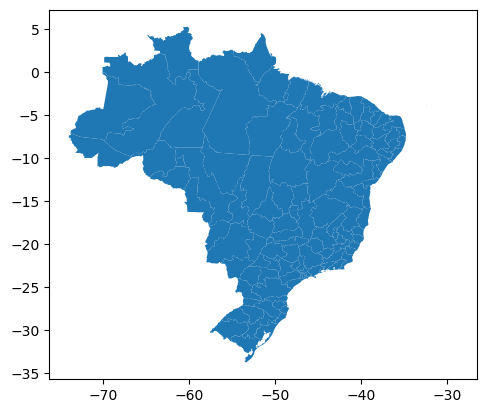

In [17]:
df2 = gpd.GeoDataFrame(df2)

df2.plot()

In [21]:
df2['uf'] = df2.code_macro.astype(str).str[:2].astype(int)

df2

,code_macro,geometry,uf
0,1101,"POLYGON ((-62.11621 -13.15942, -62.11972 -13.1...",11
1,1102,"POLYGON ((-63.12990 -12.19442, -63.12848 -12.1...",11
2,1201,"POLYGON ((-69.42491 -10.93492, -69.42799 -10.9...",12
3,1302,"POLYGON ((-70.73519 -7.76699, -70.79680 -7.759...",13
4,1304,"POLYGON ((-67.76548 -9.44838, -67.83069 -9.418...",13
...,...,...,...
113,5209,"POLYGON ((-49.61282 -15.88528, -49.61272 -15.8...",52
114,5206,"POLYGON ((-51.10390 -19.30782, -51.10570 -19.3...",52
115,5207,"MULTIPOLYGON (((-47.51099 -16.04991, -47.45232...",52
116,5210,"POLYGON ((-50.04801 -18.63881, -50.05019 -18.6...",52


In [22]:
df2.code_macro.unique().shape

(118,)

In [23]:
df2.code_macro.unique()

array([1101, 1102, 1201, 1302, 1304, 1303, 1401, 1512, 1509, 1511, 1510,
       1601, 1702, 1701, 2109, 2111, 2110, 2207, 2208, 2210, 2209, 2308,
       2310, 2309, 2307, 2306, 2402, 2401, 2501, 2502, 2503, 2607, 2606,
       2605, 2608, 2703, 2704, 2801, 2917, 2913, 2914, 2911, 2910, 2916,
       2915, 2918, 2912, 3113, 3103, 3110, 3114, 3106, 3112, 3105, 3111,
       3101, 3107, 3102, 3104, 3109, 3108, 3207, 3208, 3206, 3205, 3312,
       3310, 3311, 3533, 3531, 3528, 3518, 3529, 3519, 3532, 3530, 3526,
       3525, 3527, 3520, 3522, 3524, 3523, 3534, 3521, 4105, 4107, 4106,
       4108, 4212, 4213, 4216, 4214, 4211, 4210, 4215, 4309, 4311, 4314,
       4312, 4310, 4313, 4308, 5005, 5008, 5006, 5007, 5105, 5104, 5103,
       5101, 5102, 5208, 5209, 5206, 5207, 5210, 5302])

In [24]:
df2.loc[df2.code_macro == 1102]

,code_macro,geometry,uf
1,1102,"POLYGON ((-63.12990 -12.19442, -63.12848 -12.1...",11


In [25]:
s = df2.code_macro.value_counts()

s.loc[s ==1]

1101    1
3532    1
4107    1
4105    1
3521    1
       ..
2703    1
2608    1
2605    1
2606    1
5302    1
Name: code_macro, Length: 118, dtype: int64

In [26]:
df2.to_file('shapefile_macro2.gpkg', driver='GPKG')

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/io/file.py:174: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


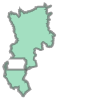

In [42]:
merged